<a href="https://colab.research.google.com/github/arpit0891/Covid-19-and-Pneumonia-detection-from-X-Ray/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "varun4singh" # username from the json file
os.environ['KAGGLE_KEY'] = "ef043f835e9f73229c5cdd8d493b80e3" # key from the json file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#this is the dataset used to build the model
!kaggle datasets download -d darshan1504/covid19-detection-xray-dataset

 96% 179M/186M [00:04<00:00, 35.8MB/s]
100% 186M/186M [00:05<00:00, 38.8MB/s]


In [ ]:
#we used this dataset to see if the model is working correctly or not
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

100% 1.15G/1.15G [00:10<00:00, 121MB/s]
100% 1.15G/1.15G [00:10<00:00, 113MB/s]


In [ ]:
#unzipping the imported dataset to their respective folder
import zipfile
with zipfile.ZipFile("covid19-detection-xray-dataset.zip","r") as zip_ref:
    zip_ref.extractall("covid19-detection-xray-dataset")
with zipfile.ZipFile("covid19-radiography-database.zip","r") as zip_ref:
    zip_ref.extractall("covid19-radiography-database")

In [ ]:
#to use the gpu on colab please enable it from the runtime setting
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
!ls

covid19-detection-xray-dataset	    covid19-radiography-database.zip
covid19-detection-xray-dataset.zip  drive
covid19-radiography-database	    sample_data


In [ ]:
#anayzing the dataset we are dealing with
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('covid19-detection-xray-dataset',"covid19-radiography-database"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
covid19-detection-xray-dataset/NonAugmentedTrain/ViralPneumonia/401.jpeg
covid19-detection-xray-dataset/NonAugmentedTrain/ViralPneumonia/187.jpeg
covid19-detection-xray-dataset/NonAugmentedTrain/ViralPneumonia/213.jpeg
covid19-detection-xray-dataset/NonAugmentedTrain/ViralPneumonia/306.jpeg
covid19-detection-xray-dataset/NonAugmentedTrain/ViralPneumonia/201.jpeg
covid19-detection-xray-dataset/NonAugmentedTrain/ViralPneumonia/7.jpeg
covid19-detection-xray-dataset/NonAugmentedTrain/ViralPneumonia/167.jpeg
covid19-detection-xray-dataset/NonAugmentedTrain/ViralPneumonia/192.jpeg
covid19-detection-xray-dataset/NonAugmentedTrain/ViralPneumonia/251.jpeg
covid19-detection-xray-dataset/NonAugmentedTrain/ViralPneumonia/47.jpeg
covid19-detection-xray-dataset/NonAugmentedTrain/ViralPneumonia/169.jpeg
covid19-detection-xray-dataset/NonAugmentedTrain/ViralPneumonia/252.jpeg
covid19-detection-xray-dataset/NonAugmentedTrain/ViralPneumonia/46.jpeg
covi

In [ ]:
!ls "/content/covid19-detection-xray-dataset"
#We used train data for traing the model 
#ValData for calculating validation accuracy
#NonAugmented data is used simply used to analyse functioning of the model 
#which lead to making a web application

NonAugmentedTrain  TrainData  ValData


In [ ]:
#removing the data from the oversampled augmented Covid-19 x-ray data and adding to Covid-19 dataset
#Here we are adding training data to make a better model with limited resources
import os
import subprocess as sbp
S_dir = "/content/covid19-detection-xray-dataset/TrainData/OversampledAugmentedCOVID-19/COVID-19"
D_dir = "/content/covid19-detection-xray-dataset/TrainData/COVID-19"
for file in os.listdir(S_dir):
    path = os.path.join(S_dir, file)
    p3 = "cp -r " + path +" " + D_dir+"/"
    sbp.Popen(p3,shell=True)

In [ ]:
#!rm -rf /content/covid19-detection-xray-dataset/TrainData/OversampledAugmentedCOVID-19

In [ ]:
!cd /content/covid19-detection-xray-dataset/TrainData/COVID-19&& ls

In [ ]:
#renaming the training dataset , which will be used in future
import shutil
S_dir = "/content/covid19-detection-xray-dataset/TrainData/COVID-19"
for file in os.listdir(S_dir):
    shutil.copy2(os.path.join(S_dir,file),os.path.join(S_dir,file.split('.')[0]+"_1"+file.split('.')[1]))
    shutil.copy2(os.path.join(S_dir,file),os.path.join(S_dir,file.split('.')[0]+"_2"+file.split('.')[1]))
    shutil.copy2(os.path.join(S_dir,file),os.path.join(S_dir,file.split('.')[0]+"_3"+file.split('.')[1]))
    shutil.copy2(os.path.join(S_dir,file),os.path.join(S_dir,file.split('.')[0]+"_4"+file.split('.')[1]))

In [ ]:
#dropping/removing the dataset to create more varity
import random
S_dir = "/content/covid19-detection-xray-dataset/TrainData/Normal"
file_Normal = list(os.listdir(S_dir))
random.shuffle(file_Normal)
for i in file_Normal[0:300]:
    os.remove(S_dir + '/' + i)

Total No of data present in each folder of TrainData

ViralPneumonia:412
Normal:601
COVID-19:600
OversampledAugmentedCOVID-19:1
BacterialPneumonia:650


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


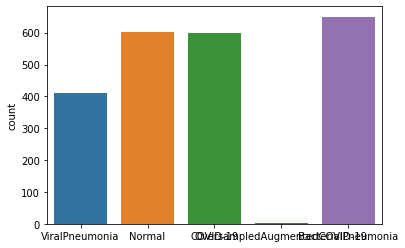

In [ ]:
#Analyzing the distribution of the Training dataset
import os
import seaborn as sns
counts = []
dir = '/content/covid19-detection-xray-dataset/TrainData'
print("Total No of data present in each folder of TrainData\n")
for filename in os.listdir(dir):
        path = os.path.join(dir, filename)
        list1 = os.listdir(path) 
        number_files = len(list1)
        counts = counts + [filename]*number_files
        print (filename + ":"+ str(number_files))

sns.countplot(counts)

Total No of data present in each folder of ValData

ViralPneumonia:205
Normal:450
COVID-19:9
BacterialPneumonia:324


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


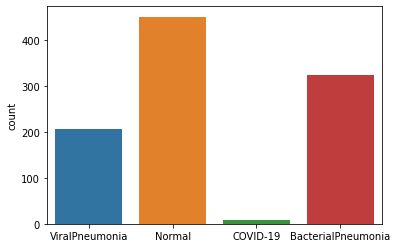

In [ ]:
#Analyzing the distribution of the Validation dataset
counts_val = []
dir = '/content/covid19-detection-xray-dataset/ValData'
print("Total No of data present in each folder of ValData\n")
for filename in os.listdir(dir):
        path = os.path.join(dir, filename)
        list1 = os.listdir(path) 
        number_files = len(list1)
        counts_val = counts_val + [filename]*number_files
        print (filename + ":"+ str(number_files))
        
sns.countplot(counts_val)

In [ ]:
!cd /content/covid19-radiography-database&& ls

'COVID-19 Radiography Database'


In [ ]:
#Preprocessing the dataset 
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
tf.test.is_gpu_available()

True

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
!ls '/content/covid19-detection-xray-dataset/TrainData'
#seeing the content of dataset

BacterialPneumonia  Normal			  ViralPneumonia
COVID-19	    OversampledAugmentedCOVID-19


In [ ]:
#removing this lable since we already shared the content to the covid19
!rm -rf /content/covid19-detection-xray-dataset/TrainData/OversampledAugmentedCOVID-19

In [ ]:
#Checking the content of training data
!ls "/content/covid19-detection-xray-dataset/TrainData/"

BacterialPneumonia  COVID-19  Normal  ViralPneumonia


In [ ]:
#showing sample of each image

import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
covid = cv2.imread("/content/covid19-detection-xray-dataset/TrainData/COVID-19/_0_1465610.jpeg")
viral = cv2.imread("/content/covid19-detection-xray-dataset/TrainData/ViralPneumonia/_0_9503218.jpeg")
Normal = cv2.imread("/kaggle/input/covid19-detection-xray-dataset/NonAugmentedTrain/Normal/_709_1358784.jpeg")
bacterial = cv2.imread("/content/covid19-detection-xray-dataset/TrainData/BacterialPneumonia/_0_4754176.jpeg")

Investigators focused on every patient's chest X-ray to examine patterns of coronavirus in their lungs, looking at the opacities (white circular markings associated with COVID) and where those patterns lay. Researchers divided the X-rays into six zones (upper right, upper left, middle right, middle left, lower right, and lower left) and developed a scoring system from zero to six to quantify severity. The total score depended on how many zones disease showed up in. Lower severity scores ranged from zero to two, and higher severity from three to six.



---



---



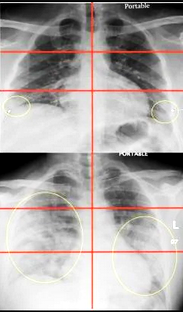



---



Top image: Chest radiograph of a 23-year-old male with no past medical history who tested positive for COVID-19 via RT-PCR and was subsequently discharged from the emergency department with home care and isolation precautions. Portable CXR shows right and left peripheral lower lung zone hazy opacities; total score=2.


---



Bottom image: Chest radiograph in a 32-year-old overweight (BMI=30) COVID-19 positive male with a history of childhood asthma who was subsequently admitted and intubated in the ICU for 3 days. Portable CXR shows opacities in all three right lung zones and in the left middle and lower lung zones; total score=5. 

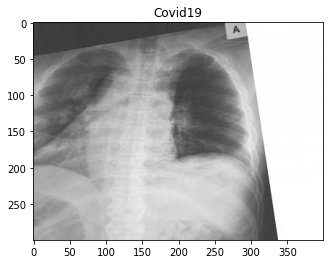

In [ ]:
plt.title("Covid19")
plt.imshow(covid)

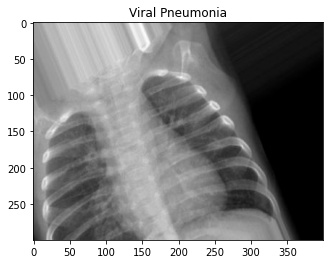

In [ ]:
plt.title("Viral Pneumonia")
plt.imshow(viral)

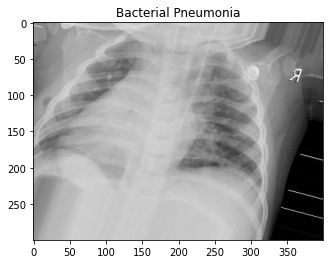

In [ ]:
plt.title("Bacterial Pneumonia")
plt.imshow(bacterial)

In [ ]:
!ls "/content/covid19-detection-xray-dataset/ValData"

BacterialPneumonia  COVID-19  Normal  ViralPneumonia


In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/covid19-detection-xray-dataset/TrainData',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 2263 images belonging to 4 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
        '/content/covid19-detection-xray-dataset/ValData',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 988 images belonging to 4 classes.


In [ ]:
# Note the input shape is the desired size of the image 224x224 with 3 bytes color
# This is the first convolution
# Flatten the results to feed into a DNN
# 512 neuron hidden layer
#50% of the layers are dropped to prevent overfitting
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 788544)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 788544)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               201867520 
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1028      
Total params: 201,870,340
Trainable params: 201,870,340
Non-trainable params: 0
________________________________________

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
#The model was trained on 40 epochs and having 64 steps per epochs
#There are total 201,870,340 prams
#We used verbose=1 for visual represntation of training

In [ ]:
history = model.fit_generator(train_generator, validation_data = test_generator, steps_per_epoch=64,epochs = 40,  verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
64/64 [==============================] - 43s 674ms/step - loss: 15.8873 - accuracy: 0.3301 - val_loss: 1.2708 - val_accuracy: 0.3259
Epoch 2/40
64/64 [==============================] - 43s 671ms/step - loss: 1.4881 - accuracy: 0.4067 - val_loss: 1.8270 - val_accuracy: 0.1751
Epoch 3/40
64/64 [==============================] - 43s 673ms/step - loss: 1.1524 - accuracy: 0.5215 - val_loss: 5.4840 - val_accuracy: 0.3279
Epoch 4/40
64/64 [==============================] - 42s 660ms/step - loss: 1.1094 - accuracy: 0.5866 - val_loss: 1.8548 - val_accuracy: 0.2874
Epoch 5/40
64/64 [==============================] - 42s 661ms/step - loss: 0.9423 - accuracy: 0.6179 - val_loss: 0.9799 - val_accuracy: 0.5779
Epoch 6/40
64/64 [==============================] - 42s 664ms/step - loss: 0.8878 - accuracy: 0.6469 - val_loss: 1.5341 - val_accuracy: 0.5759
Epoch 7/40
64/64 [==============================] - 43s 672ms/ste

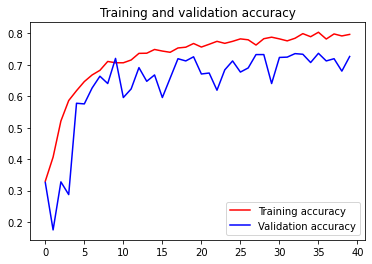

<Figure size 432x288 with 0 Axes>

In [ ]:
#Graph to show the the accuracy per epochs
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

We achived training accuracy of 79.70% and validation accuracy of 72.67% without any overfitiing or underfitting.

---



In [ ]:
# classes=model.predict_classes('covid19-detection-xray-dataset/ValData/COVID-19/9.jpeg')
# print(classes)

In [ ]:
model.save("covid-19.h5")

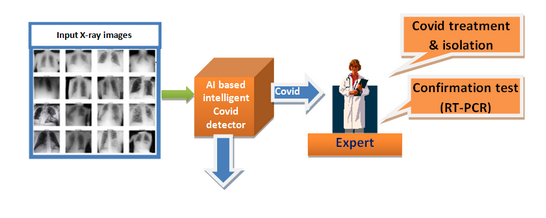

Image credit: DRDO



*       CAIR, DRDO has developed an AI based intelligent, secure, web based, Covid detection application software ATMAN using Chest X-rays which can classify the images into Normal, Covid-19 and Pneumonia classes using limited number (few hundreds) of sample images.
    

*   Virus affects the lungs early even before the patient starts showing significant symptoms. Thus, compared to RT-PCR test which takes many hours, an X-ray based diagnostic tool can detect the infection in early stages with processing time in seconds.

*   ATMAN back end has been built with Deep Convolution Neural Network which is tuned to accurately detect Covid-19 irrespective of limited availability of Covid X-ray images for the system to learn. The software automatically pre-processes the images before passing them to the Neural net to take care of the variant illuminations levels of the X-ray images. The software is easy to navigate and can be easily accessed over Internet through a variety of devices like mobiles, tablets, laptops or computers.





---



We tried to implimented similar thing . Though the accuracy is not state of the art ,as of DRDO at 95%.
But with limited resourse and knowledge we managed an validation accuracy of 72.67% .
We made a web application using this model and trying to deploy using AWS edu.

In [ ]:

dir = '/content/covid19-detection-xray-dataset/ValData'
print("Total No of data present in each folder of NonAugmented\n")
for filename in os.listdir(dir):
        path = os.path.join(dir, filename)
        list = os.listdir(path) 
        number_files = len(list)
        #counts_val = counts_val + [filename]*number_files
        print (filename + ":"+ str(number_files))

Total No of data present in each folder of NonAugmented

ViralPneumonia:205
Normal:450
COVID-19:9
BacterialPneumonia:324
